# Генерация распределений. Проверка определений известных распределений.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm, chi2, f, t
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

a = 0
b = 1
n = 1000
np.random.seed()

# Генерация выборки распределения Гаусса

In [ ]:
def gauss(k):
    samples = np.random.uniform(a, b, (k, n))
    sums = np.array(samples.sum(axis=0))
    m = int(round(1 + np.log2(sums.size)))
    plt.hist(samples[0], edgecolor = 'w', density = True, range = (a, b))
    plt.show()

    mu = np.mean(sums)
    s = np.sqrt(1/(sums.size-1)*sum((sums - mu)**2))

    bins_dens = plt.hist(sums, bins=m, edgecolor = 'black', facecolor = 'None', density = True)[:-1]
    plt.plot(sorted(sums), norm.pdf(sorted(sums), mu, s), color='C0')
    plt.axvline(x=mu, color='b')
    plt.axvline(x=mu+s, color='r')
    plt.axvline(x=mu-s, color='r')
    plt.show()

    bins = plt.hist(sums, bins=m, edgecolor = 'black', facecolor = 'None')[:-1]
    plt.clf()

    Pi = np.array([norm.cdf(bins[1][i+1], loc = mu, scale = s) - norm.cdf(bins[1][i], loc = mu, scale = s) for i in range(bins[1].size - 1)])
    nP = Pi * sums.size
    x2 = sum((bins[0] - nP)**2/nP)
    crx2 = chi2.ppf(0.95, bins[0].size - 3)
    print(x2, ' < ', crx2)

    x = [((bins_dens[1][i] + bins_dens[1][i+1])/2 - mu)**2 for i in range(bins_dens[1].size - 1)]
    x = np.array(x).reshape(-1, 1)
    y = np.log(bins_dens[0])

    model_lr = LinearRegression()
    model_lr.fit(x, y)
    pred_lr = model_lr.predict(x)
    plt.plot(x, pred_lr)
    r2 = r2_score(y, pred_lr)
    plt.plot(x, y, 'go')
    plt.grid()
    plt.show()
    print(r2)

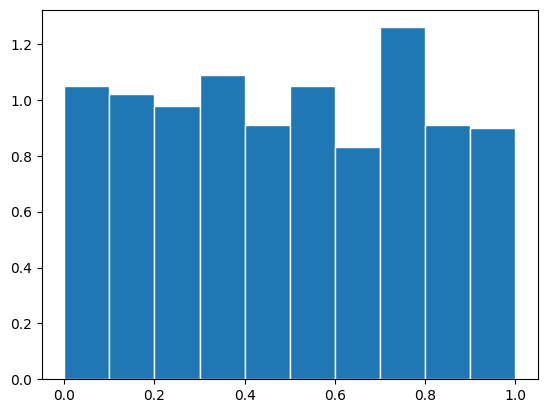

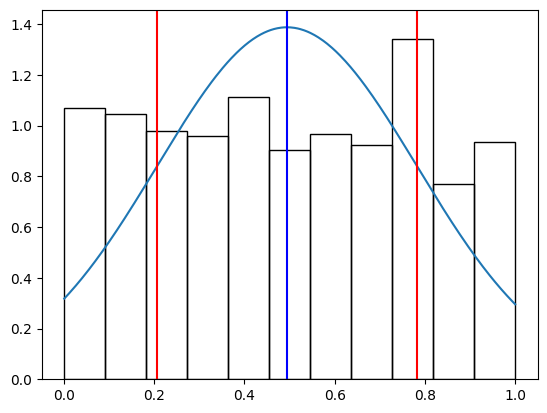

247.0745649003727  <  15.50731305586545


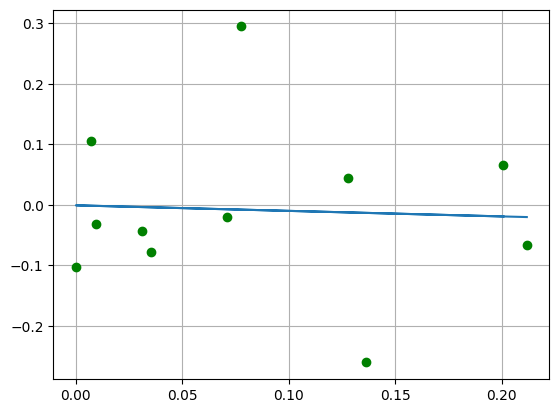

0.0025035294898568816


In [ ]:
gauss(1)

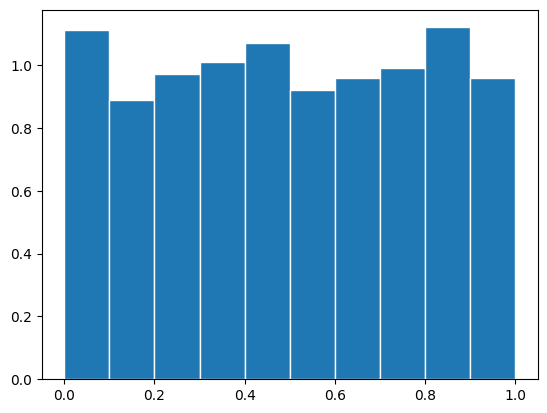

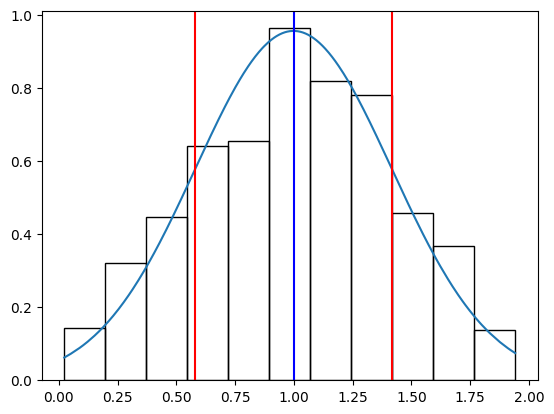

30.762601110288635  <  15.50731305586545


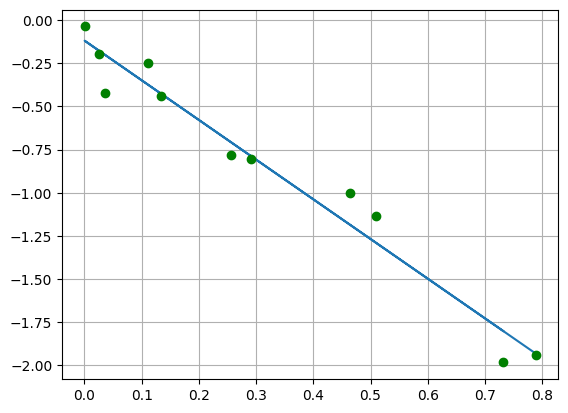

0.9615407854968393


In [ ]:
gauss(2)

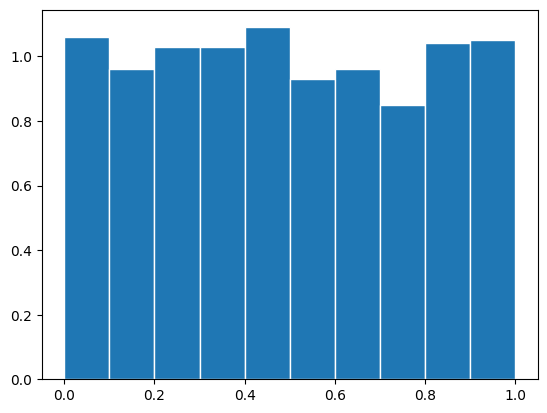

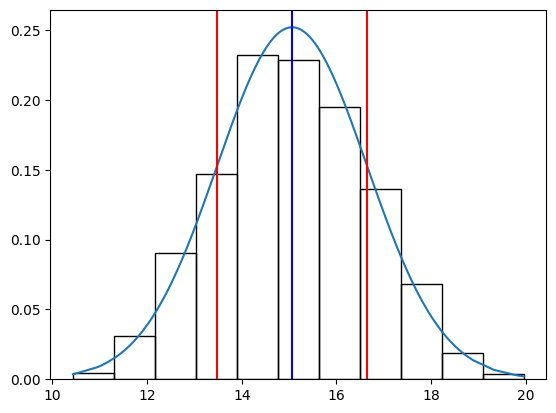

8.35052780577317  <  15.50731305586545


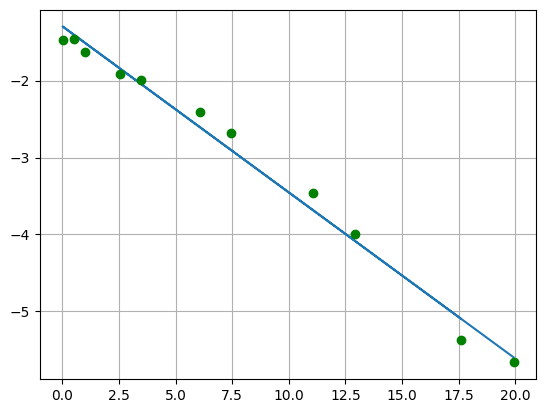

0.9875183812972668


In [ ]:
gauss(30)

# Генерация выборки распределения Пирсона

In [ ]:
def pirson(k):
    samples = np.random.normal(size=(k, n))

    plt.hist(samples[0], edgecolor = 'w', density = True)
    plt.show()

    samples = np.array([(row - np.mean(row)) ** 2 / np.std(row) ** 2 for row in samples])
    sums = np.array(samples.sum(axis=0))

    m = int(round(1 + np.log2(sums.size)))

    mu = np.mean(sums)
    s = np.sqrt(1/(sums.size-1)*sum((sums - mu)**2))

    bins_dens = plt.hist(sums, bins=m, edgecolor = 'black', facecolor = 'None', density = True)[:-1]
    plt.plot(sorted(sums), chi2.pdf(sorted(sums), k), color='C0')
    plt.show()

    bins = plt.hist(sums, bins=m, edgecolor = 'black', facecolor = 'None')[:-1]
    plt.clf()

    Pi = np.array([chi2.cdf(bins[1][i+1], df=k) - chi2.cdf(bins[1][i], df=k) for i in range(bins[1].size - 1)])
    nP = Pi * sums.size

    x2 = sum((bins[0] - nP)**2/nP)

    crx2 = chi2.ppf(0.95, bins[0].size - 2)
    print(x2, ' < ', crx2)

    plt.plot(bins_dens[0], bins_dens[0])
    pred = chi2.pdf(np.array([(bins_dens[1][i+1]+bins_dens[1][i])/2 for i in range(bins_dens[1].size-1)]), k)
    plt.plot(bins_dens[0], pred, 'go')
    plt.grid()
    plt.show()
    r2 = r2_score(bins_dens[0], pred)
    print(r2)

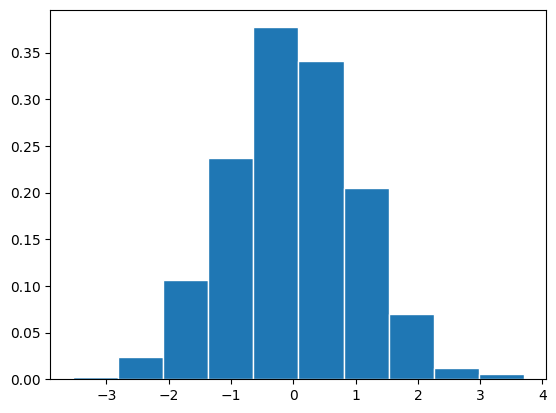

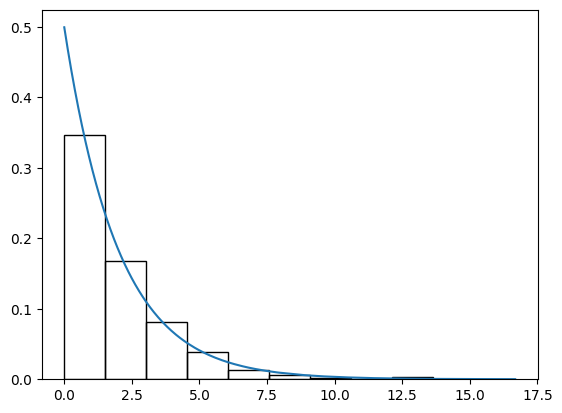

19.096883267475  <  16.918977604620448


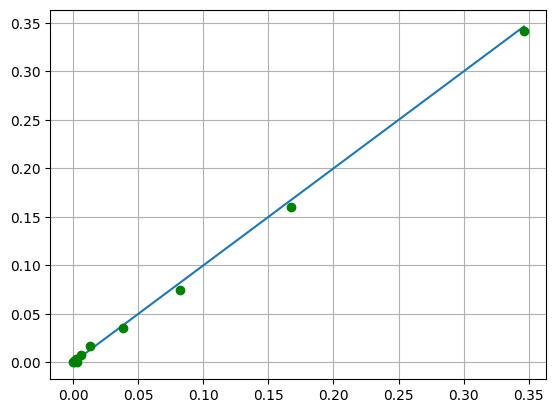

0.9987081875897147


In [ ]:
pirson(2)

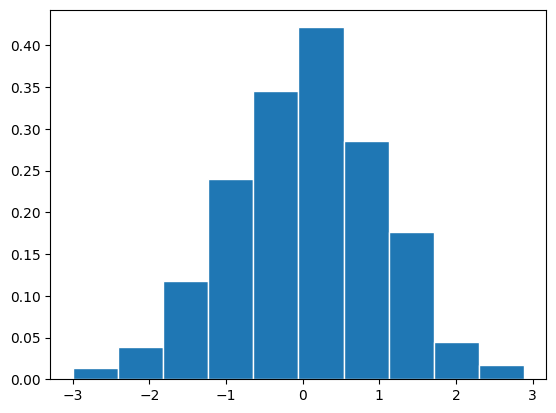

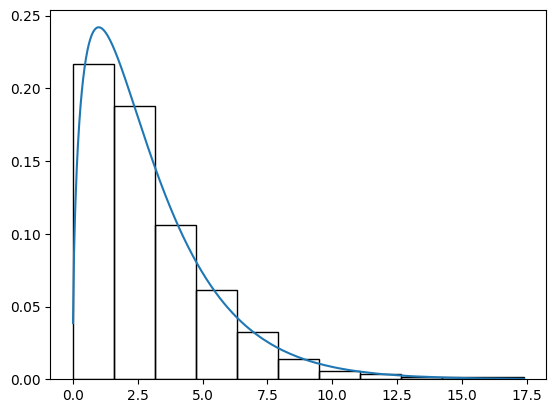

6.290538241974276  <  16.918977604620448


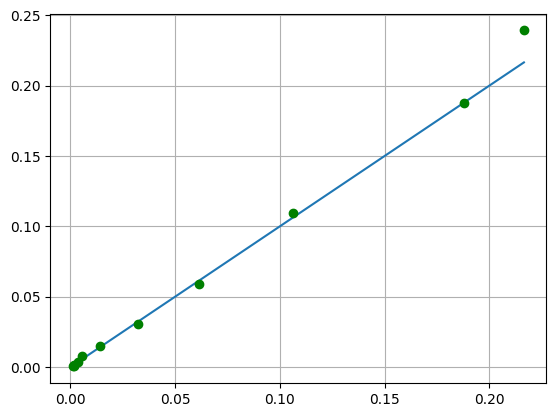

0.9912602073356482


In [ ]:
pirson(3)

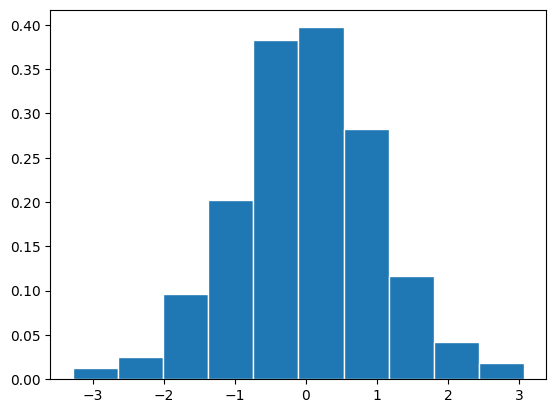

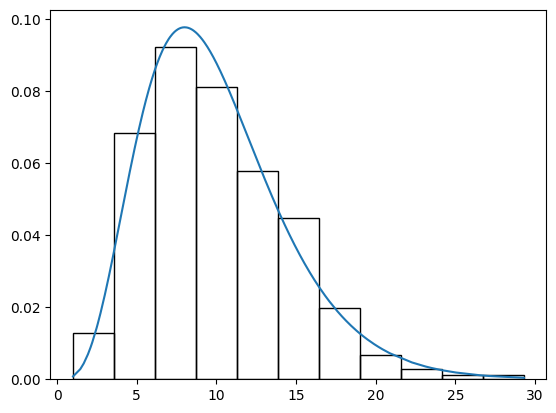

12.892467360784616  <  16.918977604620448


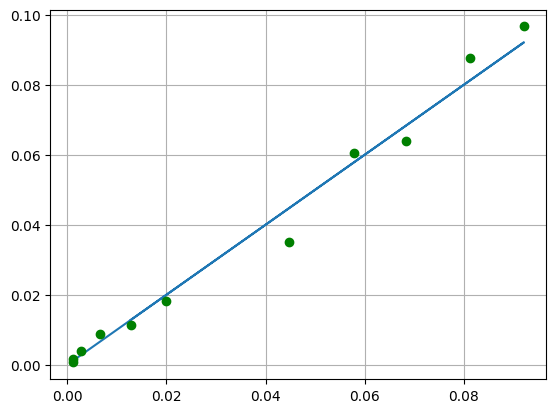

0.9841232809535797


In [ ]:
pirson(10)

# Генерация выборки распределения Фишера

In [ ]:
def fisher():
    n = 1000
    d1 = 5
    d2 = 10
    y1 = chi2.rvs(df=d1, size=n)
    y2 = chi2.rvs(df=d2, size=n)

    sums = (y1 / d1) / (y2 / d2)
    m = int(round(1 + np.log2(sums.size)))

    plt.hist(y1, edgecolor = 'w', density = True)
    plt.show()
    plt.hist(y2, edgecolor = 'w', density = True)
    plt.show()

    bins_dens = plt.hist(sums, bins=m, edgecolor = 'black', facecolor = 'None', density = True)[:-1]
    plt.plot(sorted(sums), f.pdf(sorted(sums), d1, d2), color='C0')
    plt.show()

    bins = plt.hist(sums, bins=m, edgecolor = 'black', facecolor = 'None')[:-1]
    plt.clf()

    mu = np.mean(sums)
    s = np.sqrt(1/(sums.size-1)*sum((sums - mu)**2))
    Pi = np.array([f.cdf(bins[1][i+1], dfn=d1, dfd=d2) - f.cdf(bins[1][i], dfn=d1, dfd=d2) for i in range(bins[1].size - 1)])
    nP = Pi * sums.size
    x2 = sum((bins[0] - nP)**2/nP)
    crx2 = chi2.ppf(0.95, bins[0].size - 3)
    print(x2, ' < ', crx2)

    plt.plot(bins_dens[0], bins_dens[0])
    pred = f.pdf(np.array([(bins_dens[1][i+1]+bins_dens[1][i])/2 for i in range(bins_dens[1].size-1)]), d1, d2)
    plt.plot(bins_dens[0], pred, 'go')
    plt.grid()
    plt.show()
    r2 = r2_score(bins_dens[0], pred)
    print(r2)

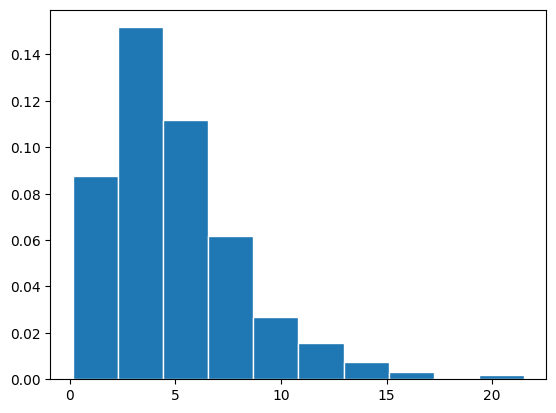

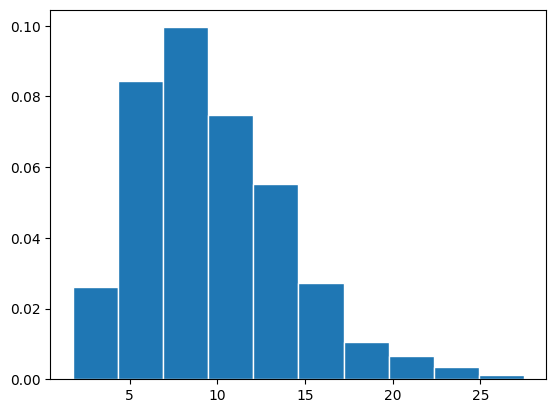

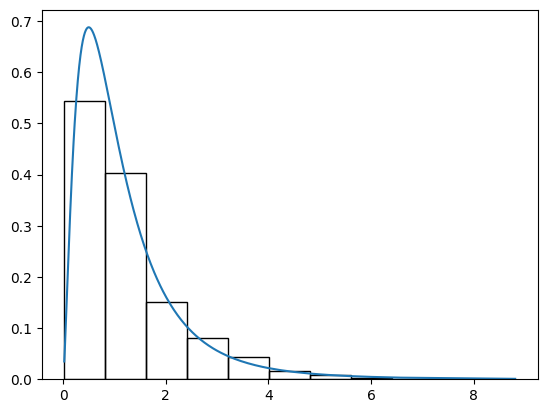

8.416488877458274  <  15.50731305586545


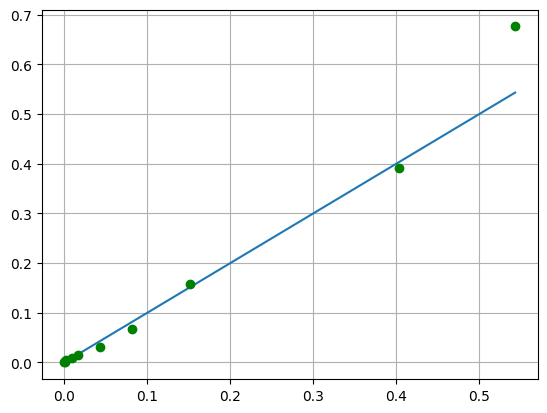

0.9474957647877436


In [ ]:
fisher()

# Генерация выборки распределения Стьюдента

In [ ]:
def student(k):
    n = 500
    samples = np.random.normal(size = (k, n))
    sums = np.array([row[0]/np.sqrt(np.sum(row[1:]**2)/k) for row in samples.T])

    m = int(round(1 + np.log2(sums.size)))
    plt.hist(samples[0], edgecolor = 'w', density = True)
    plt.show()

    mu = np.mean(sums)
    s = np.sqrt(1/(sums.size-1)*sum((sums - mu)**2))

    bins_dens = plt.hist(sums, bins=m, edgecolor = 'black', facecolor = 'None', density = True)[:-1]
    plt.plot(sorted(sums), t.pdf(sorted(sums), k), color='C0')
    plt.show()

    bins = plt.hist(sums, bins=m, edgecolor = 'black', facecolor = 'None')[:-1]
    plt.clf()

    Pi = np.array([t.cdf(bins[1][i+1], k) - t.cdf(bins[1][i], k) for i in range(bins[1].size - 1)])
    nP = Pi * sums.size
    x2 = sum((bins[0] - nP)**2/nP)
    crx2 = chi2.ppf(0.95, bins[0].size - 3)
    print(x2, ' < ', crx2)

    plt.plot(bins_dens[0], bins_dens[0])
    pred = t.pdf(np.array([(bins_dens[1][i+1]+bins_dens[1][i])/2 for i in range(bins_dens[1].size-1)]), k)
    plt.plot(bins_dens[0], pred, 'go')
    plt.grid()
    plt.show()
    r2 = r2_score(bins_dens[0], pred)
    print(r2)

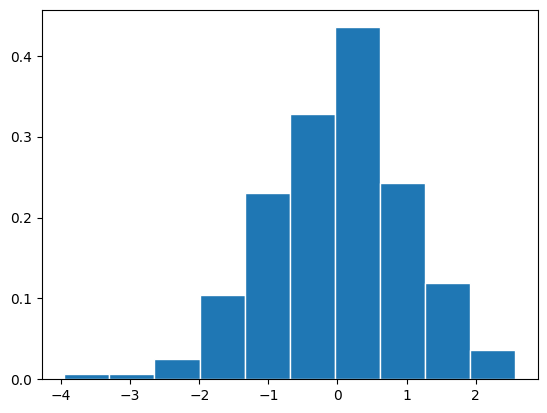

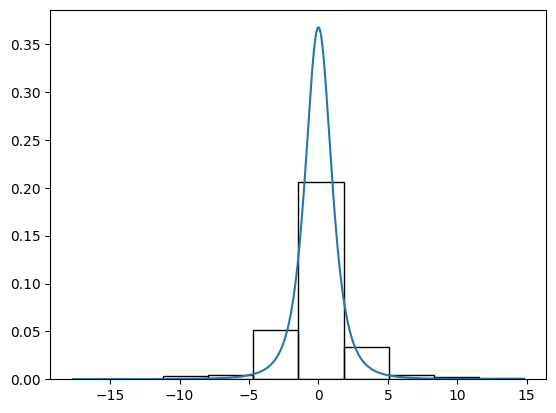

135.72423644118112  <  14.067140449340169


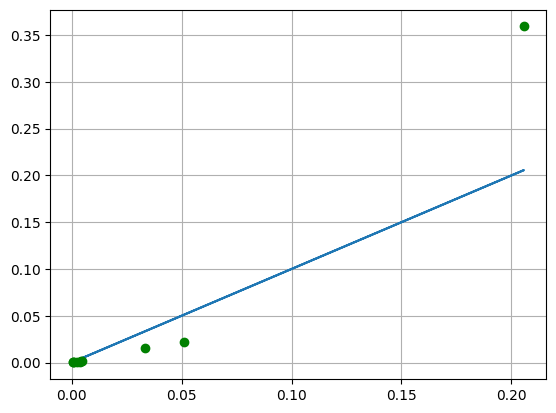

0.3225511138188576


In [ ]:
student(3)

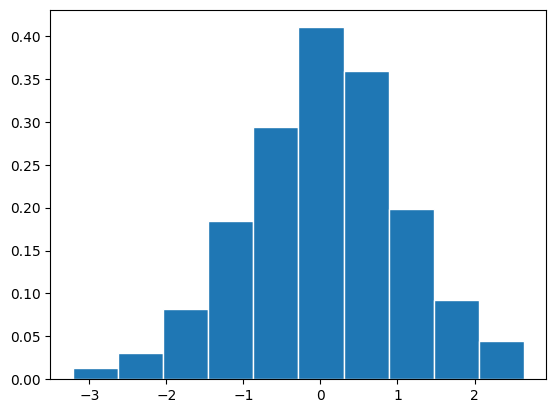

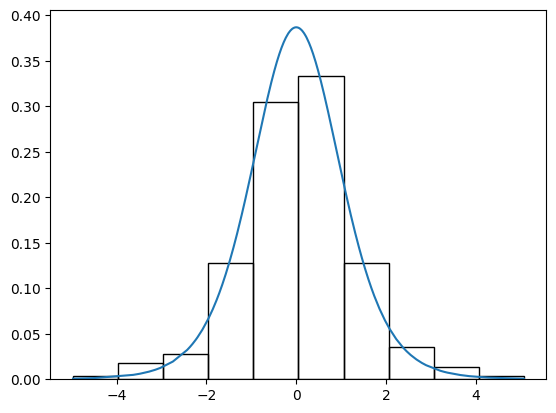

22.44931998249497  <  14.067140449340169


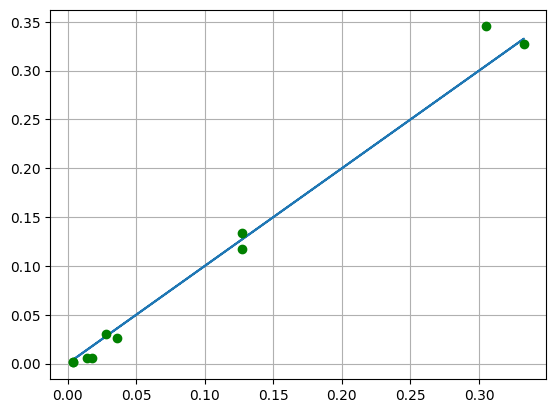

0.9847357350752781


In [ ]:
student(8)